<a href="https://colab.research.google.com/github/Tanuja2725/deeplearning/blob/main/Enginerring_using_keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 05th November, 2021
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 308-312
#
#####################################
# Engineering with NN architecture
# Using keras functional API 
#####################################

# Functional Models
See this [an excellent article](https://keras.io/guides/functional_api/) on Functional Modeling<br><br>
The Keras functional API is a way to create models that are more flexible than the Sequential API. The functional API can handle models with non-linear sequence, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a graph  of layers. So the functional API is a way to build graphs of layers.

## Getting X and y
After here you can jumpy to any of the models

In [ ]:
# 1.0 Import libraries
import pandas as pd
import numpy as np

# 1.0.1 sklearn related
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1.1 Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# 1.3 Mount google drive as /gdrive
#     directly under root:

#from google.colab import drive
#drive.mount('/gdrive')

In [ ]:
data=fetch_california_housing()

In [ ]:
data.target #house values

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
 X = data.data #features
 X.shape

(20640, 8)

In [ ]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
df=pd.DataFrame(X, columns = data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# 2.0 Get Data
#     The data needs little processing
housing = fetch_california_housing(return_X_y= False)
type(housing)   # sklearn.utils.Bunch

sklearn.utils.Bunch

In [ ]:
# 2.1 Seperate X,y
X = housing.data
y = housing.target
X.shape   # (20640, 8)

(20640, 8)

In [ ]:
# 2.1.1
X.shape
y.shape

(20640, 8)

(20640,)

In [ ]:
# 2.2 Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
# 2.3 Show data field names
#print(housing.DESCR)
#housing.feature_names

In [ ]:
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(
                                                  X,
                                                  y,
                                                  test_size = 0.2
                                                  )
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(16512, 8)

(4128, 8)

In [ ]:
#functional models

In [ ]:
inp= tf.keras.Input(shape = (8,))

In [ ]:
x = tf.keras.layers.Dense(units = 32, activation = 'relu')(inp)


In [ ]:
m1=tf.keras.models.Model(inputs = [inp] ,outputs = [x])

In [ ]:
m1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)

In [ ]:
m2=Model(inputs = [inp] ,outputs = [x])

In [ ]:
m2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
Total params: 2,400
Trainable params: 2,400
Non-trainable params: 0
_________________________________________________________________


In [ ]:
type(inp)

keras.engine.keras_tensor.KerasTensor

In [ ]:
x=tf.keras.layers.concatenate([inp , x])

In [ ]:
m3=Model(inputs = [inp] ,outputs = [x])
m3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           288         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           2112        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 72)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']          

In [ ]:
out = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
model = Model(inputs = [inp] , outputs = [out])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           288         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           2112        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 72)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']          

In [ ]:
model.compile(loss='mse', optimizer = 'adam' ,metrics='mse')

In [ ]:
model.fit(X_train , y_train,
          epochs = 50,
          validation_split=0.2,
          )

Epoch 1/50
413/413 [==============================] - 2s 3ms/step - loss: 2.5718 - mse: 2.5718 - val_loss: 2.5297 - val_mse: 2.5297
Epoch 2/50
413/413 [==============================] - 1s 2ms/step - loss: 2.4659 - mse: 2.4659 - val_loss: 2.5286 - val_mse: 2.5286
Epoch 3/50
413/413 [==============================] - 1s 2ms/step - loss: 2.4655 - mse: 2.4655 - val_loss: 2.5285 - val_mse: 2.5285
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 2.4654 - mse: 2.4654 - val_loss: 2.5284 - val_mse: 2.5284
Epoch 5/50
413/413 [==============================] - 1s 2ms/step - loss: 2.4654 - mse: 2.4654 - val_loss: 2.5284 - val_mse: 2.5284
Epoch 6/50
413/413 [==============================] - 1s 2ms/step - loss: 2.4653 - mse: 2.4653 - val_loss: 2.5283 - val_mse: 2.5283
Epoch 7/50
413/413 [==============================] - 1s 2ms/step - loss: 2.4644 - mse: 2.4644 - val_loss: 2.5256 - val_mse: 2.5256
Epoch 8/50
413/413 [==============================] - 1s 2ms/step - loss: 2.

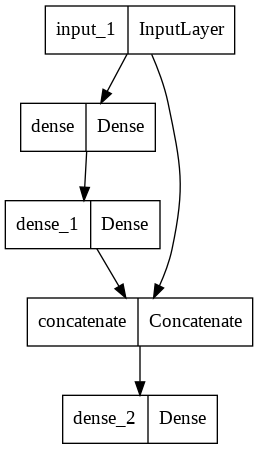

In [ ]:
plot_model(model)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
X_test.shape

(4128, 8)

In [ ]:
inp_lt= tf.keras.Input(shape = (5, ))

In [ ]:
inp2_rt = tf.keras.Input(shape = (3, ))

In [ ]:
x_lt= tf.keras.layers.Dense(units=56, activation ='relu')(inp_lt)

In [ ]:
x_lt = tf.keras.layers.Dense(56, activation ='relu')(x_lt)

In [ ]:
x_rt=tf.keras.layers.Dense(16,activation ='relu')(inp2_rt)

In [ ]:
x_rt=tf.keras.layers.Dense(48,activation ='selu')(x_rt)

In [ ]:
x_lt.shape

TensorShape([None, 56])

In [ ]:
x_rt.shape

TensorShape([None, 48])

In [ ]:
x=tf.keras.layers.concatenate([x_lt, x_rt])

In [ ]:
x.shape

TensorShape([None, 104])

In [ ]:
out= tf.keras.layers.Dense(1,activation ='linear')(x)

In [ ]:
model = tf.keras.models.Model(inputs = [inp2_rt,inp_lt],outputs = [out])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 56)           336         ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 16)           64          ['input_3[0][0]']                
                                                                                            

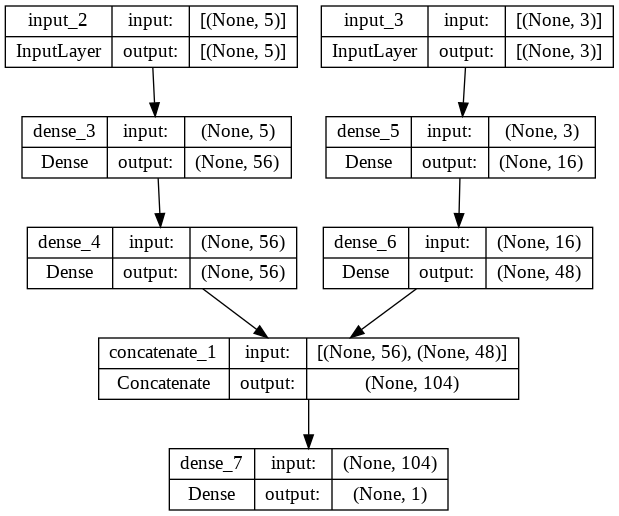

In [ ]:
plot_model(model, show_shapes =True)

In [ ]:
x.shape

TensorShape([None, 104])

In [ ]:
model.compile(loss ='mse' ,optimizer = 'adam' ,metrics = 'mse')

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 56)           336         ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 16)           64          ['input_3[0][0]']                
                                                                                            

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
y_train.shape

(16512,)

In [ ]:
model.fit( [X_train[:,5:], X_train[:,:5]],
          y_train,
          epochs=50,
          validation_split=0.2)

Epoch 1/50
413/413 [==============================] - 2s 3ms/step - loss: 0.6650 - mse: 0.6650 - val_loss: 0.4084 - val_mse: 0.4084
Epoch 2/50
413/413 [==============================] - 1s 3ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.3975 - val_mse: 0.3975
Epoch 3/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3718 - mse: 0.3718 - val_loss: 0.3538 - val_mse: 0.3538
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3543 - mse: 0.3543 - val_loss: 0.3435 - val_mse: 0.3435
Epoch 5/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3430 - mse: 0.3430 - val_loss: 0.3294 - val_mse: 0.3294
Epoch 6/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3361 - mse: 0.3361 - val_loss: 0.3272 - val_mse: 0.3272
Epoch 7/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3321 - mse: 0.3321 - val_loss: 0.3453 - val_mse: 0.3453
Epoch 8/50
413/413 [==============================] - 1s 2ms/step - loss: 0.

## Wide and Deep Network--Dense layers

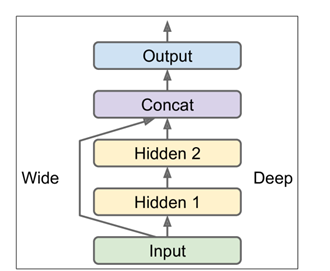

### Inputs
<b>Input transforms numpy array into tensors to be used by subsequent layers.</b><br><br>
<i>Input()</i> is used to instantiate a class that will perform the transformation to Keras tensor.
<u>Inputs is the shape of each object.</u> <br> In a tabular data, each row is an object. In Image data, each image is an object. So, in the former case, it is one dimensional and in the later case two-dimensional.  <br><br>
**Purpose**: *Purpose of Input is to tell the rest of the model as to what tensor object is to be expected by the rest of model*

```
tf.keras.Input(
    shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None,
    ragged=None, type_spec=None, **kwargs
)
```

In [ ]:
# 3.1 Design model

# 3.1.1 Inputs to model. Note that inputs is NOT
#       a part of layers object
#       Input() is used to instantiate a Keras tensor.
#       This tensor will get populated when .fit() is
#       invoked and data starts flowing in.
#       Purpose: Define what tensor shape is to be expected
#                by the model

inputs = tf.keras.Input(
                         shape = X.shape[1],
                         batch_size=None
                        )

type(inputs)

keras.engine.keras_tensor.KerasTensor

In [ ]:
# 3.1.2 Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)

<dtype: 'float32'>
(None, 8)
input_1


In [ ]:
# 3.2 Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)

In [ ]:
# 3.2.1 Get nature of 'x'

print(type(x))
print(x.shape )  # (None, 100)

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 100)


In [ ]:
# 3.2.2 Examine x:

type(x)
x.shape

keras.engine.keras_tensor.KerasTensor

TensorShape([None, 100])

In [ ]:
# 3.3 Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)

In [ ]:
# 3.3.1 Concatenate 
x = tf.keras.layers.concatenate([x,inputs])


In [ ]:
# 3.3.2 Final layer
out = layers.Dense(1,activation = 'sigmoid')(x)

In [ ]:
# 3.3.3 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [ ]:
# 3.4 Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          900         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 108)          0           ['dense_1[0][0]',                
                                                                  'input_1[0][0]']            

In [ ]:
# 3.5 `Model` groups layers into an object 
#       with training and inference features.
help(Model)

Help on class Model in module keras.engine.training:

class Model(keras.engine.base_layer.Layer, keras.utils.version_utils.ModelVersionSelector)
 |  Model(*args, **kwargs)
 |  
 |  `Model` groups layers into an object with training and inference features.
 |  
 |  Args:
 |      inputs: The input(s) of the model: a `keras.Input` object or list of
 |          `keras.Input` objects.
 |      outputs: The output(s) of the model. See Functional API example below.
 |      name: String, the name of the model.
 |  
 |  There are two ways to instantiate a `Model`:
 |  
 |  1 - With the "Functional API", where you start from `Input`,
 |  you chain layer calls to specify the model's forward pass,
 |  and finally you create your model from inputs and outputs:
 |  
 |  ```python
 |  import tensorflow as tf
 |  
 |  inputs = tf.keras.Input(shape=(3,))
 |  x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
 |  outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
 |  model = tf.kera

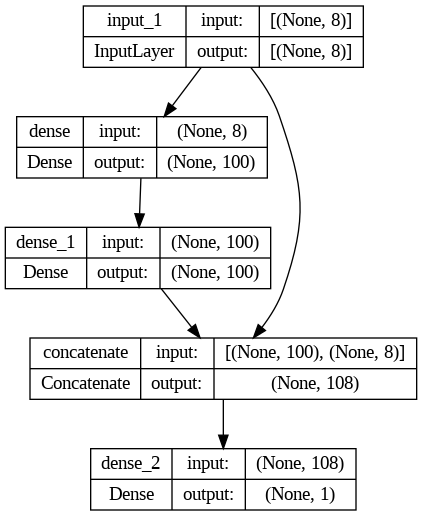

In [ ]:
# 3.6 Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model, show_shapes= True)

In [ ]:
# 3.7 Compile model
model.compile(loss = "mean_squared_error")  
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 2.4629
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4352
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4345
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4340
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4336
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4331
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4328
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4327
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4325
Epoch 10/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4323
Epoch 11/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4321
Epoch 12/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4319
Epoch 13/50
516/516 [====

In [ ]:
# 3.8 
model.evaluate(X_test,y_test)  # 2.56280517578125

129/129 [==============================] - 0s 1ms/step - loss: 2.5989


2.598900556564331

In [ ]:
X_train.shape

(16512, 8, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

In [ ]:
X_train.shape

(16512, 8, 1)

In [ ]:
inp = tf.keras.Input(shape = (8,1)) #cnn 

In [ ]:
x_lt =tf.keras.layers. Conv1D(filters =32 ,kernel_size=3,activation ='relu')(inp)


In [ ]:
x_lt =tf.keras.layers. Conv1D(filters =64 ,kernel_size=3,activation ='relu')(x_lt)


In [ ]:
#tf.keras.layers.Flattern()
#tf.keras.layers.Flattern()

In [ ]:
m1= tf.keras.models.Model(inputs = [inp],outputs =[x_lt])

In [ ]:
m1.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 conv1d_37 (Conv1D)          (None, 6, 32)             128       
                                                                 
 conv1d_38 (Conv1D)          (None, 4, 64)             6208      
                                                                 
Total params: 6,336
Trainable params: 6,336
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_rt =tf.keras.layers. Conv1D(filters =64 ,kernel_size=3,activation ='relu')(inp)


In [ ]:
x_rt =tf.keras.layers. Conv1D(filters =128 ,kernel_size=3,activation ='relu')(x_rt)


In [ ]:
m2= tf.keras.models.Model(inputs = [inp],outputs =[x_rt])
m2.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 conv1d_39 (Conv1D)          (None, 6, 64)             256       
                                                                 
 conv1d_40 (Conv1D)          (None, 4, 128)            24704     
                                                                 
Total params: 24,960
Trainable params: 24,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out.shape

TensorShape([None, 4, 192])

In [ ]:
out = tf.keras.layers.concatenate([x_lt , x_rt])

In [ ]:
out=tf.keras.layers.Dense(32,activation = 'relu')(out)

In [ ]:
out=tf.keras.layers.Dense(1)(out)

In [ ]:
model=Model(inputs = [inp], outputs =[out])

In [ ]:
model.compile(loss = 'mse',metrics =['mse'])

In [ ]:
model.fit(X_train,y_train,validation_split =0.2,epochs =50)

Epoch 1/50
413/413 [==============================] - 4s 7ms/step - loss: 1.5093 - mse: 1.5093 - val_loss: 1.4128 - val_mse: 1.4128
Epoch 2/50
413/413 [==============================] - 3s 7ms/step - loss: 1.3748 - mse: 1.3748 - val_loss: 1.3117 - val_mse: 1.3117
Epoch 3/50
413/413 [==============================] - 3s 6ms/step - loss: 1.3649 - mse: 1.3649 - val_loss: 1.3218 - val_mse: 1.3218
Epoch 4/50
413/413 [==============================] - 2s 5ms/step - loss: 1.3653 - mse: 1.3653 - val_loss: 1.3166 - val_mse: 1.3166
Epoch 5/50
413/413 [==============================] - 2s 5ms/step - loss: 1.3629 - mse: 1.3629 - val_loss: 1.3428 - val_mse: 1.3428
Epoch 6/50
413/413 [==============================] - 2s 6ms/step - loss: 1.3583 - mse: 1.3583 - val_loss: 1.3052 - val_mse: 1.3052
Epoch 7/50
413/413 [==============================] - 2s 5ms/step - loss: 1.3602 - mse: 1.3602 - val_loss: 1.4061 - val_mse: 1.4061
Epoch 8/50
413/413 [==============================] - 2s 5ms/step - loss: 1.

In [ ]:
del model

In [ ]:
inp = tf.keras.Input(shape = (8,1))
x_lt = tf.keras.layers.Conv1D( filters = 32, kernel_size = 3)(inp)
x_lt = tf.keras.layers.BatchNormalization()(x_lt)
x_lt= tf.keras.layers.Activation(activation ='relu')(x_lt)
x_lt = tf.keras.layers.Conv1D(filters = 64, kernel_size =3, activation = 'relu')(x_lt)
x_rt = tf.keras.layers.Conv1D( filters = 64, kernel_size = 3 )(inp)
x_rt = tf.keras.layers.BatchNormalization()(x_rt)
x_rt= tf.keras.layers.Activation(activation ='relu')(x_rt)
x_rt = tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, activation = 'relu')(x_rt)
#tf.keras.layers.Dropout(0.5)(inp)
out = tf.keras.layers.concatenate([x_lt, x_rt])
out = tf.keras.layers.Dense(32, activation = 'relu')(out)
out = tf.keras.layers.Dense(64, activation = 'relu')(out)
out = tf.keras.layers.Dense(1)(out)
model=Model(inputs = [inp], outputs =[out])
model.compile(loss = 'mse', metrics = ['mse'])
model.fit(X_train,y_train, validation_split = 0.2, epochs = 50)

Epoch 1/50
413/413 [==============================] - 5s 8ms/step - loss: 1.5345 - mse: 1.5345 - val_loss: 1.3891 - val_mse: 1.3891
Epoch 2/50
413/413 [==============================] - 3s 7ms/step - loss: 1.3752 - mse: 1.3752 - val_loss: 1.3507 - val_mse: 1.3507
Epoch 3/50
413/413 [==============================] - 3s 7ms/step - loss: 1.3643 - mse: 1.3643 - val_loss: 1.3376 - val_mse: 1.3376
Epoch 4/50
413/413 [==============================] - 3s 7ms/step - loss: 1.3553 - mse: 1.3553 - val_loss: 1.5273 - val_mse: 1.5273
Epoch 5/50
413/413 [==============================] - 3s 7ms/step - loss: 1.3539 - mse: 1.3539 - val_loss: 1.3320 - val_mse: 1.3320
Epoch 6/50
413/413 [==============================] - 4s 8ms/step - loss: 1.3495 - mse: 1.3495 - val_loss: 1.3371 - val_mse: 1.3371
Epoch 7/50
413/413 [==============================] - 3s 7ms/step - loss: 1.3490 - mse: 1.3490 - val_loss: 1.3365 - val_mse: 1.3365
Epoch 8/50
413/413 [==============================] - 3s 7ms/step - loss: 1.

## Wide and Deep Network--Convolution Network

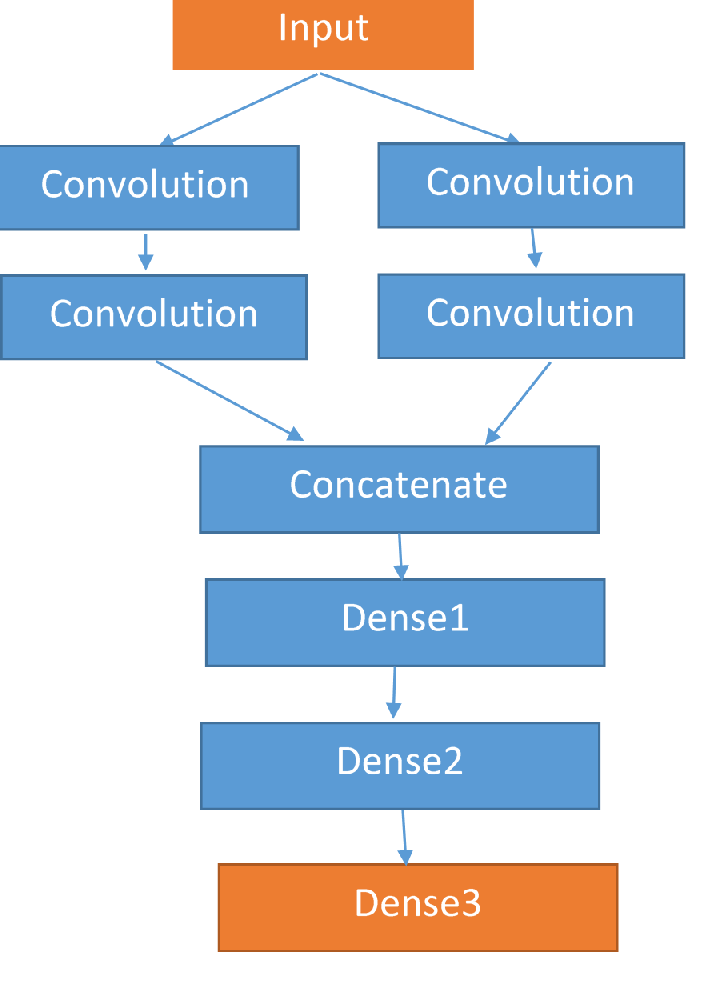

## Convolution layers--Refresher
Also refer [here](https://cs231n.github.io/convolutional-networks/) for animated **gif**

### How Conv2D works

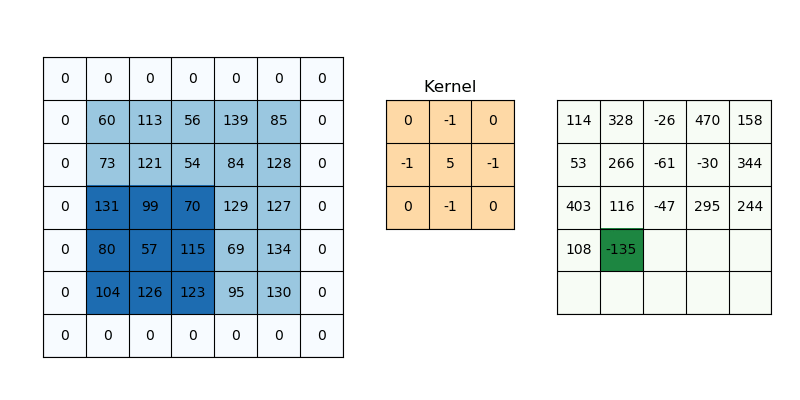

In [ ]:
# Check above
-99 -80 + 57 * 5 -115 -126

-135

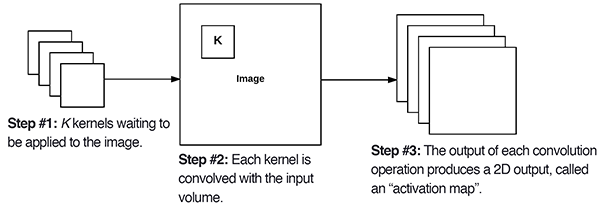

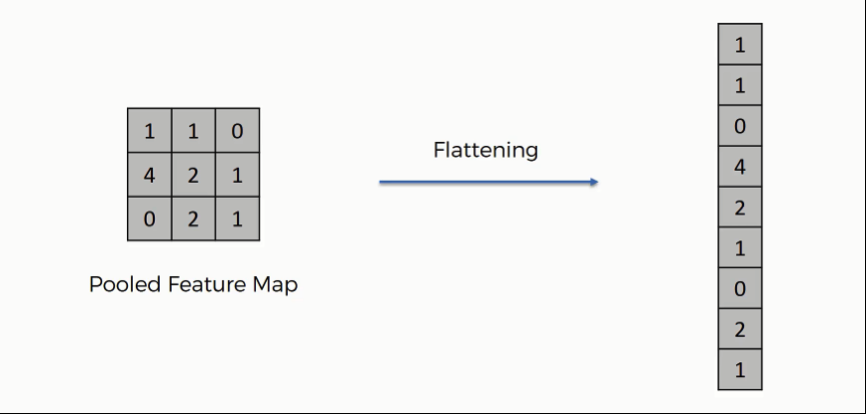

### How Conv1D works
Also see here for [dilation convolution](https://jinglescode.github.io/2020/11/01/how-convolutional-layers-work-deep-learning-neural-networks/)

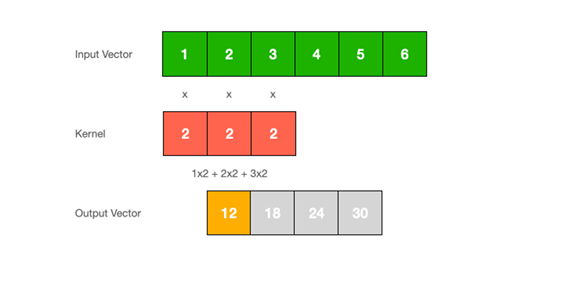

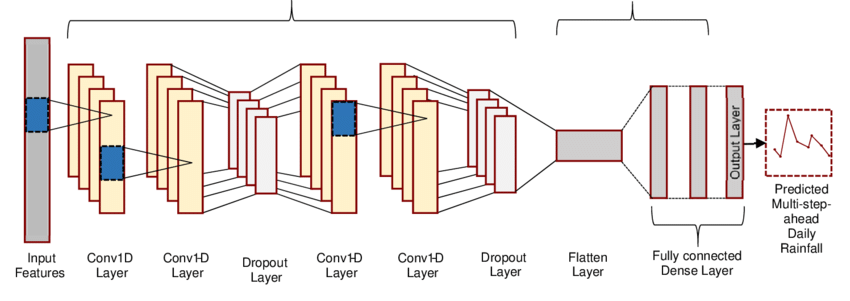

### Dilated convolution kernel

You may have noticed the term “dilated convolutions”. Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements, and a parameter controls the dilation rate. A dilation rate of 2 means there is a space between the kernel elements. Essentially, a convolution kernel with dilation = 1 corresponds to a regular convolution.

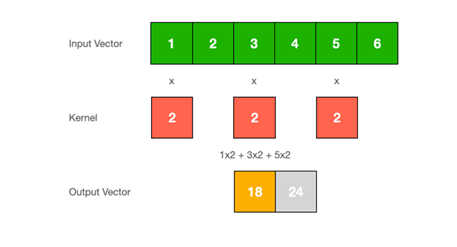

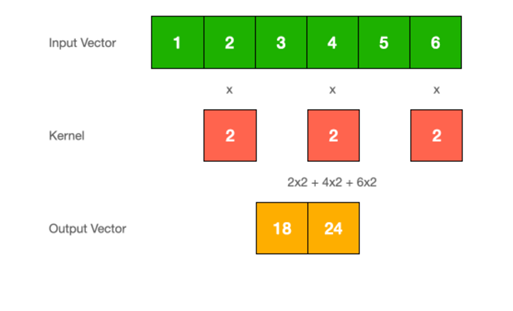

## Model now

In [ ]:
# 4.1 Regarding train data
no_of_samples_tr = X_train.shape[0]             # Each row is one sample: 7705
input_features = X_train.shape[1]               # No of features: 178
channels = 1
batch_size_tr = no_of_samples_tr                # Data being less, we will
                                                # use all samples in the batch

In [ ]:
# 4.2 Regarding test data
no_of_samples_test = X_test.shape[0]           # 3795
input_features = X_test.shape[1]               # No of features. 178
channels = 1
batch_size_test = no_of_samples_test           # 3795

In [ ]:
# 4.3 Reshape input train/test data as required by Keras for conv1D:

train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [ ]:
# 4.4
train.shape   # (16512, 8, 1)
test.shape    # (4128, 8, 1)

(16512, 8, 1)

(4128, 8, 1)

In [ ]:
 # 5.0 Design model

# 5.1 Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(
                         shape = (train.shape[1],train.shape[2])   # (8,1)
                        )


In [ ]:
# 5.2 Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [ ]:
# 5.2.1
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [ ]:
# 5.3 Add convolution layers to right arm

x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)

# 5.3.1
x_rt = layers.Conv1D(
                      filters = 128,
                      kernel_size=3,
                      activation='relu'
                    )(x_rt)


In [ ]:
# 5.4 Concatenate layers & Flatten:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [ ]:
# 5.4.1
x = layers.Flatten()(x)

In [ ]:
# 5.5 Add Dense (classification) layers

x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [ ]:
# 5.6 Final layer & model:

out = layers.Dense(1,activation = 'sigmoid')(x)

In [ ]:
# 5.7 Create model now
model1 = Model(inputs = [inputs], outputs = [out])

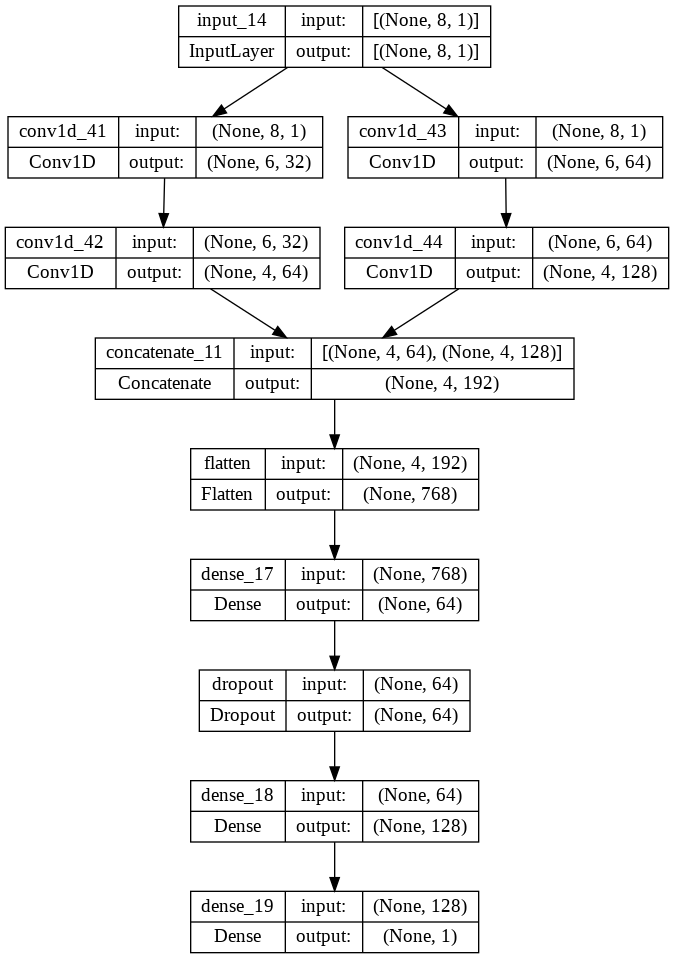

In [ ]:
# 5.8 Display model now

plot_model(model1, show_shapes= True)

In [ ]:
# 5.8 Compile model
model1.compile(
                 loss = "mean_squared_error",
                 optimizer='adam'
              )  

In [ ]:
# 5.8.1
history = model1.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
516/516 [==============================] - 4s 6ms/step - loss: 2.5236
Epoch 2/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 3/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 4/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 5/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 6/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 7/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 8/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 9/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 10/50
516/516 [==============================] - 3s 5ms/step - loss: 2.5026
Epoch 11/50
516/516 [==============================] - 3s 6ms/step - loss: 2.5026
Epoch 12/50
516/516 [==============================] - 3s 5ms/step - loss: 2.5026
Epoch 13/50
516/516 [====

In [ ]:
# 5.9 
model1.evaluate(test,y_test)  

129/129 [==============================] - 0s 1ms/step - loss: 2.4724


2.472395420074463

## Two inputs one output

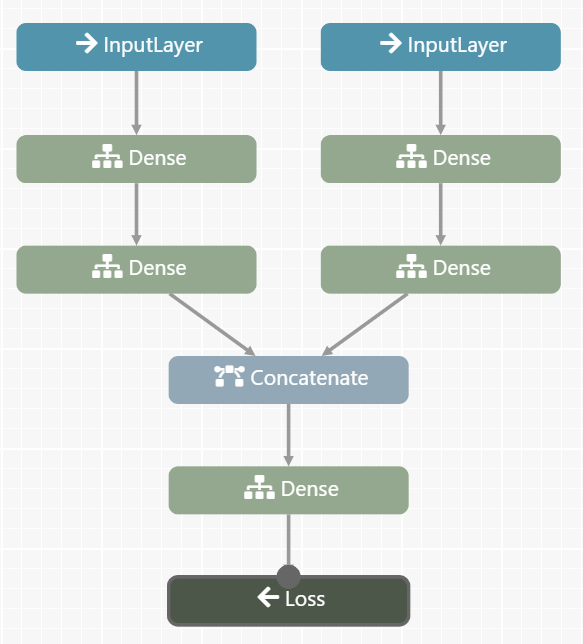

### Quick Code

**Steps**
```
# a. Define two inputs
data1 = X_train[:,:4].copy()
data2 = X_train[:,1:8].copy()

# b. Two inputs into network: 
inputsA = tf.keras.Input(
                         shape = data1.shape[1] ,
                         name = "abc"
                         )
inputsB = tf.keras.Input(
                         shape = data2.shape[1],
                         name = "cde"
                         )

# c. Built two models as usual with each of two inputs
# d. Concatenate output tensor of two models
# e. Define your model
model = Model(inputs = [inputsA,inputsB], outputs = [out])
# f. Compile model
# g. Train the model now.
model.fit(

	          {
             "abc" : data1,
             "cde" : data2
            },
            y_train,
            epochs = 5
           )
```

In [ ]:
# 6.0 Two inputs
data1 = X_train[:,:4].copy()
data2 = X_train[:,1:8].copy()

# Define shapes of tensors getting into our models: 
inputsA = tf.keras.Input(
                         shape = data1.shape[1] ,
                         name = "abc"
                         )
inputsB = tf.keras.Input(
                         shape = data2.shape[1],
                         name = "cde"
                         )

# 6.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 6.1.1 Other arm of network
y = layers.Dense(100, activation = 'relu')(inputsA)
y = layers.Dense(100,activation= 'relu')(y)

# 6.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,y])

# 6.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)

# 6.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])


# 6.5 Compile model
model2.compile(
               optimizer='rmsprop', 
               loss = 'mean_squared_error'
               )

# 6.6 Train the model now.
#     We must have a way to match
#     our ORIGINAL InputsA and InputsB
#     with what is fed here:

model2.fit(

	          {
             "abc" : data1,
             "cde" : data2
            },
            y_train,
            epochs = 5
           )


### Line-by-line explanation

In [ ]:
# 6.0 We have two inputs
inputsA = tf.keras.Input(shape = X_train[:,:4].shape[1:])
inputsB = tf.keras.Input(shape = X_train[:,1:8].shape[1:])

In [ ]:
# 6.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)


In [ ]:
# 6.1.1 Other arm of network
y = layers.Dense(100, activation = 'relu')(inputsA)
y = layers.Dense(100,activation= 'relu')(y)


In [ ]:
# 6.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,y])

In [ ]:
# 6.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)


In [ ]:
# 6.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])
model2.summary()

In [ ]:
# 6.5 Compile model
model2.compile(
               optimizer='rmsprop', 
               loss = 'mean_squared_error'
               )

# 6.6 Train the model now.
#     Note the two train inputs
model2.fit(
            [X_train[:,:4], X_train[:,1:8]],
            y_train,
            epochs = 100
           )

In [ ]:
# 6.7 
model2.evaluate( [X_test[:,:4], X_test[:,1:8]],y_test)  

129/129 [==============================] - 0s 2ms/step - loss: 2.5633


2.563317060470581

In [ ]:
# 6.8 Plot our model
plot_model(model2)

## Two inputs and two outputs model
Can be skipped in the class

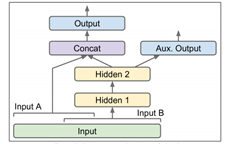

In [ ]:
# 7.0 We have two inputs.
#     To distiguish them, we give names to each
inputsA = tf.keras.Input(
                          shape = X_train[:,:4].shape[1:],
                          name = "in_a"
                         )

# 7.1
inputsB = tf.keras.Input(
                          shape = X_train[:,1:8].shape[1:],
                          name = "in_b"
                        )


# 7.2 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 7.3 Concatenate an input with output of one arm
concat = layers.concatenate([x,inputsA])

# 7.4 Output layers
#     We have two output layers. To distiguish them, we give names to each
out_x = layers.Dense(1,activation = 'sigmoid' , name = "out_a")(concat)
out_y = layers.Dense(1,activation = 'sigmoid', name = "out_b")(x)

# 7.5 Create model and show summary
#     While outputs are two, model is one
main_model = Model(inputs = [inputsA,inputsB], outputs = [out_x, out_y])
main_model.summary()


In [ ]:
# 7.6 Plot the model now
plot_model(main_model, show_shapes = True)

In [ ]:
# 8.0 Compile model now
# Ref: Model.compile: 
#      https://wwwa.tensorflow.org/api_docs/python/tf/keras/Model

main_model.compile(
                     loss = ['mse', 'mse'],        # Could also be in dict() format
                     metrics = "mse",
                     loss_weights= {"out_a": 0.9,   # More weight to error here
                                    "out_b" : 0.1   # Less weight to error here
                                    }
                   )

In [ ]:
# 8.1
main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               [y_train,y_train],
               epochs = 100
           )

In [ ]:
# 8.2 One can also write outputs in a dictionary form, as:

main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input     
               },              
               {
                   "out_a" : y_train,
                   "out_b" : y_train
               },
               epochs = 100
           )

In [ ]:
# 8.3 To evaluate, we must also supply two inputs
main_model.evaluate(
                     [X_test[:,:4],X_test[:,1:8]],
                      y_test
                    )

129/129 [==============================] - 0s 1ms/step - loss: 2.5633 - out_a_loss: 2.5632 - out_b_loss: 2.5639 - out_a_mse: 2.5632 - out_b_mse: 2.5639


[2.5633063316345215,
 2.563241958618164,
 2.563885450363159,
 2.563241958618164,
 2.563885450363159]

In [ ]:
########### It is done ##############